Covid-19's impact on US Company Earnings: Deep Dive
Goal: How has Covid-19 affected stock market reaction to company earnings across different industries within the US. Analysis will be divided into two time frames with two sub categories each:
Time periods:
Before the pandemic (Normal)
After the pandemic(Alternate)
Sub Categories:
The two week period leading up towards an earnings report
Stock market reaction to earnings report the following day after

Data:
Earnings data and stock data will be gathered from yahoo finance, publicly available data source. Data collection will be done through webscraping and open source, public packages.

Analysis:

Conclusion:

In [1]:
######Data Collection###########

In [1059]:
from bs4 import BeautifulSoup 
import requests 
import pandas as pd
import numpy as np
from datetime import date, timedelta, datetime
from time import sleep
import scipy as sp


In [228]:
#### S&P Company List ####
html = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
spy_co = []
html_request = requests.get(html)
soup = BeautifulSoup(html_request.content, 'html.parser')
table = soup.find('table')
tablerows = table.find_all('tr')
a = pd.DataFrame()
for tr in tablerows:
    td = tr.find_all('td')
    if not td:
        continue
    row = [i.text for i in td]
    spy_co.append(row)
spy_co = pd.DataFrame(spy_co)
for (columnName, columnData) in spy_co.iteritems():
    spy_co[columnName] = spy_co[columnName].str.strip()
spy_co.columns = ['Ticker', 'Company_Name', 'SEC_Filings', 'Sector', 'Industry', 'HQ Location', 
                 'Date Added', 'CIK Number', 'Year Founded']
spy_co.head()

,Ticker,Company_Name,SEC_Filings,Sector,Industry,HQ Location,Date Added,CIK Number,Year Founded
0,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",1976-08-09,0000066740,1902
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,0000001800,1888
2,ABBV,AbbVie Inc.,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,0001551152,2013 (1888)
3,ABMD,ABIOMED Inc,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,0000815094,1981
4,ACN,Accenture plc,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,0001467373,1989


In [284]:
start_date = date(2016, 1, 1)   # start date
end_date = date(2020, 9, 1)   # end date
it = 1

import yfinance as yf
a  = yf.Ticker(spy_co['Ticker'][0])
stock_data= a.history(start = start_date, end= end_date)
stock_data['Ticker'] = spy_co['Ticker'][0]
for val in spy_co['Ticker'][1:]:
    a = yf.Ticker(val).history(start = start_date, end = end_date)
    a['Ticker'] = val
    stock_data = stock_data.append(a)
    sleep(1.5)
    print(it)
    it = it +1


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
- BRK.B: No data found, symbol may be delisted
66
67
68
69
70
71
72
73
74
75
76
77
78
- BF.B: No data found for this date range, symbol may be delisted
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249

,Adj Close,Close,Dividends,High,Low,Open,Stock Splits,Ticker,Volume
Date,,,,,,,,,
2016-01-04,NaN,128.03,0.0,129.34,126.79,129.11,0.0,MMM,3277200.0
2016-01-05,NaN,128.59,0.0,128.63,126.98,128.03,0.0,MMM,2688100.0
2016-01-06,NaN,126.00,0.0,127.11,125.07,126.96,0.0,MMM,2997100.0
2016-01-07,NaN,122.93,0.0,124.82,122.64,124.28,0.0,MMM,3553500.0
2016-01-08,NaN,122.51,0.0,124.27,122.28,123.27,0.0,MMM,2664000.0


In [244]:
def earnings_scrape(ticker): 
    html = 'https://finance.yahoo.com/calendar/earnings?symbol=' + ticker
    earnings = []
    html_request = requests.get(html)
    soup = BeautifulSoup(html_request.content, 'html.parser')
    table = soup.find('table')
    if table == None:
        return
    tablerows = table.find_all('tr')
    for tr in tablerows:
        td = tr.find_all('td')
        if not td:
            continue
        row = [i.text for i in td]
        row.append(html[-10:])
        earnings.append(row)
    return pd.DataFrame(np.array(earnings[0:12]))



In [306]:
#######Manual Scraping For Earnings#######
tickers =list(spy_co.Ticker)
tickers.sort()
earnings = earnings_scrape(tickers[0])
for tic in tickers[1:]:
    e = earnings_scrape(tic)
    if e is None:
        print(tic)
    earnings =earnings.append(e)
    sleep(1.75)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
BF.B
60
61
62
63
64
65
66
67
68
69
BRK.B
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
DD
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
FOX
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272


,0,1,2,3,4,5,6
0,A,"Agilent Technologies, Inc.","Aug 18, 2020, 12 AMEDT",0.66,0.78,+17.65,s?symbol=A
1,A,"Agilent Technologies, Inc.","May 21, 2020, 12 AMEDT",0.61,0.71,+17.16,s?symbol=A
2,A,"Agilent Technologies, Inc.","Feb 18, 2020, 12 AMEDT",0.81,0.81,+0.12,s?symbol=A
3,A,"Agilent Technologies, Inc.","Nov 25, 2019, 12 AMEDT",0.86,0.89,+4.09,s?symbol=A
4,A,"Agilent Technologies, Inc.","Aug 14, 2019, 12 AMEDT",0.72,0.76,+5.12,s?symbol=A
...,...,...,...,...,...,...,...
7,ZTS,Zoetis Inc.,"Nov 01, 2018, 12 AMEDT",0.77,0.83,+7.93,symbol=ZTS
8,ZTS,Zoetis Inc.,"Aug 02, 2018, 12 AMEDT",0.7,0.77,+9.69,symbol=ZTS
9,ZTS,Zoetis Inc.,"May 02, 2018, 12 AMEDT",0.69,0.75,+8.07,symbol=ZTS
10,ZTS,Zoetis Inc.,"Feb 15, 2018, 12 AMEDT",0.66,0.69,+4.86,symbol=ZTS


In [679]:
earnings_frame = earnings
earnings_frame = earnings_frame.drop(columns = [6])
earnings_frame.columns = ['Ticker', 'Company_Name', 'Earnings Date', 'EPS Estimate', 'Actual EPS', '% Difference']



In [680]:
earnings_frame['% Difference'] = earnings_frame['% Difference'].replace('-', np.NaN)
earnings_frame['Actual EPS'] = earnings_frame['Actual EPS'].replace('-', np.NaN)
earnings_frame['EPS Estimate'] = earnings_frame['EPS Estimate'].replace('-', np.NaN)


earnings_frame['% Difference'] = earnings_frame['% Difference'].replace('+', '')

earnings_frame['% Difference']= earnings_frame['% Difference'].astype('float')
earnings_frame['Actual EPS']= earnings_frame['Actual EPS'].astype('float')
earnings_frame['EPS Estimate']= earnings_frame['EPS Estimate'].astype('float')
earnings_frame['Earnings Date'] = earnings_frame['Earnings Date'].str.replace(r', \d+ \w+$', '')


earnings_frame.head()



,Ticker,Company_Name,Earnings Date,EPS Estimate,Actual EPS,% Difference
0,A,"Agilent Technologies, Inc.","Aug 18, 2020",0.66,0.78,17.65
1,A,"Agilent Technologies, Inc.","May 21, 2020",0.61,0.71,17.16
2,A,"Agilent Technologies, Inc.","Feb 18, 2020",0.81,0.81,0.12
3,A,"Agilent Technologies, Inc.","Nov 25, 2019",0.86,0.89,4.09
4,A,"Agilent Technologies, Inc.","Aug 14, 2019",0.72,0.76,5.12


In [287]:
earnings.to_csv('earnings_latest.csv')

In [68]:
spy_co.to_csv('Company Information.csv')

In [294]:
stock_data =stock_data.reset_index()

In [298]:
stock_data.to_csv('S&P500_StockData.csv')

Data Cleaning and Analysis

In [1478]:
%matplotlib inline
import datapackage
import matplotlib.pyplot as plt
import seaborn

In [1479]:
stock_data = pd.read_csv('S&P500_StockData.csv' )
stock_data = stock_data.drop_duplicates()
stock_data =stock_data.drop(columns = ['Adj Close', 'Dividends', 'Unnamed: 0'])
stock_data

,Date,Close,High,Low,Open,Stock Splits,Ticker,Volume
0,2016-01-04,128.03,129.34,126.79,129.11,0.0,MMM,3277200.0
1,2016-01-05,128.59,128.63,126.98,128.03,0.0,MMM,2688100.0
2,2016-01-06,126.00,127.11,125.07,126.96,0.0,MMM,2997100.0
3,2016-01-07,122.93,124.82,122.64,124.28,0.0,MMM,3553500.0
4,2016-01-08,122.51,124.27,122.28,123.27,0.0,MMM,2664000.0
...,...,...,...,...,...,...,...,...
582087,2020-08-25,158.58,158.87,156.64,157.99,0.0,ZTS,1076100.0
582088,2020-08-26,159.76,160.41,157.22,157.58,0.0,ZTS,1917800.0
582089,2020-08-27,159.61,161.03,158.57,160.00,0.0,ZTS,1121700.0
582090,2020-08-28,160.00,160.18,158.59,159.41,0.0,ZTS,926000.0


In [1480]:
earnings_data = pd.read_csv('earnings_latest.csv')
earnings_data = earnings_data.drop(columns = ['Unnamed: 0'])
earnings_data['Earnings_Date'] = pd.to_datetime(earnings_data['Earnings_Date'])
earnings_data




,Ticker,Earnings_Date,QTR,EPS_Estimate,Actual_EPS,Release_Time,%Difference
0,A,2016-02-16,01/2016,0.430,0.46,post,0.069767
1,A,2016-05-16,04/2016,0.390,0.44,post,0.128205
2,A,2016-08-17,07/2016,0.470,0.49,post,0.042553
3,A,2016-11-15,10/2016,0.520,0.59,post,0.134615
4,A,2017-02-14,01/2017,0.490,0.53,post,0.081633
...,...,...,...,...,...,...,...
9189,ZTS,2019-08-06,06/2019,0.820,0.90,pre,0.097561
9190,ZTS,2019-11-07,Q3,0.883,0.94,NaN,0.064553
9191,ZTS,2020-02-13,Q4,0.879,0.92,pre,0.046644
9192,ZTS,2020-05-06,Q1,0.862,0.95,NaN,0.102088


In [1481]:
day = [x.weekday() for x in earnings_data['Earnings_Date']] 
day = pd.Series(day)
suns = day[day==6].index
earnings_data.loc[suns, 'Earnings_Date'] = earnings_data.loc[suns, 'Earnings_Date'] + timedelta(days = 1)
sats = day[day==5].index
earnings_data.loc[sats, 'Earnings_Date'] = earnings_data.loc[sats, 'Earnings_Date'] + timedelta(days = 2)

In [1482]:
earnings_data['Earnings_Date']= earnings_data['Earnings_Date'].astype('str')
earnings_data['earningskey'] = earnings_data[['Earnings_Date', 'Ticker']].apply(lambda x: ''.join(x), axis=1)
earnings_data['Earnings_Date'] = pd.to_datetime(earnings_data['Earnings_Date'])

stock_data['Date']= stock_data['Date'].astype('str')
stock_data['earningskey'] = stock_data[['Date', 'Ticker']].apply(lambda x: ''.join(x), axis=1)
stock_data['Date'] = pd.to_datetime(stock_data['Date'])

In [1483]:
stock_data['HLOC'] = stock_data.iloc[:,[1,2,3,4]].mean(axis=1)
stock_data['PCT_CHANGE'] = stock_data.groupby('Ticker')['HLOC'].apply(pd.Series.pct_change)
#stock_data = stock_data.set_index(['Date'])
stock_data

,Date,Close,High,Low,Open,Stock Splits,Ticker,Volume,earningskey,HLOC,PCT_CHANGE
0,2016-01-04,128.03,129.34,126.79,129.11,0.0,MMM,3277200.0,2016-01-04MMM,128.3175,NaN
1,2016-01-05,128.59,128.63,126.98,128.03,0.0,MMM,2688100.0,2016-01-05MMM,128.0575,-0.002026
2,2016-01-06,126.00,127.11,125.07,126.96,0.0,MMM,2997100.0,2016-01-06MMM,126.2850,-0.013841
3,2016-01-07,122.93,124.82,122.64,124.28,0.0,MMM,3553500.0,2016-01-07MMM,123.6675,-0.020727
4,2016-01-08,122.51,124.27,122.28,123.27,0.0,MMM,2664000.0,2016-01-08MMM,123.0825,-0.004730
...,...,...,...,...,...,...,...,...,...,...,...
582087,2020-08-25,158.58,158.87,156.64,157.99,0.0,ZTS,1076100.0,2020-08-25ZTS,158.0200,-0.000617
582088,2020-08-26,159.76,160.41,157.22,157.58,0.0,ZTS,1917800.0,2020-08-26ZTS,158.7425,0.004572
582089,2020-08-27,159.61,161.03,158.57,160.00,0.0,ZTS,1121700.0,2020-08-27ZTS,159.8025,0.006677
582090,2020-08-28,160.00,160.18,158.59,159.41,0.0,ZTS,926000.0,2020-08-28ZTS,159.5450,-0.001611


In [1484]:
import time
start_time = time.time()
temp =earnings_data.set_index('earningskey')
def is_earnings(row, earnings):
    try:
        boolean = earnings.loc[row['earningskey']].index
        return True
    except Exception:
        return False
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
stock_data['Is_Earnings'] = stock_data.apply(is_earnings, earnings= temp, axis=1)
print("--- %s seconds ---" % (time.time() - start_time))

--- 32.18239188194275 seconds ---


In [1486]:
earnings_data = earnings_data[earnings_data['earningskey'].isin(stock_data['earningskey'])]
earnings_data =earnings_data.reset_index()
earnings_data = earnings_data.drop(columns = 'index')
earnings_data

,Ticker,Earnings_Date,QTR,EPS_Estimate,Actual_EPS,Release_Time,%Difference,earningskey
0,A,2016-02-16,01/2016,0.430,0.46,post,0.069767,2016-02-16A
1,A,2016-05-16,04/2016,0.390,0.44,post,0.128205,2016-05-16A
2,A,2016-08-17,07/2016,0.470,0.49,post,0.042553,2016-08-17A
3,A,2016-11-15,10/2016,0.520,0.59,post,0.134615,2016-11-15A
4,A,2017-02-14,01/2017,0.490,0.53,post,0.081633,2017-02-14A
...,...,...,...,...,...,...,...,...
9132,ZTS,2019-08-06,06/2019,0.820,0.90,pre,0.097561,2019-08-06ZTS
9133,ZTS,2019-11-07,Q3,0.883,0.94,NaN,0.064553,2019-11-07ZTS
9134,ZTS,2020-02-13,Q4,0.879,0.92,pre,0.046644,2020-02-13ZTS
9135,ZTS,2020-05-06,Q1,0.862,0.95,NaN,0.102088,2020-05-06ZTS


In [1476]:
#to_remove = earnings_data.loc[earnings_data.groupby('Ticker')['Earnings_Date'].idxmin()]
index_list = []
for val in list(set(stock_data['Ticker'])):
    a = stock_data[stock_data['Ticker'] == val]
    for index, row in a.iterrows():
        a = int(row['Is_Earnings'])
        if a==0:
            index_list.append(index)
        else:
            break
index_list
stock_data = stock_data.drop(index_list)

In [1477]:
stock_data

,Date,Close,High,Low,Open,Stock Splits,Ticker,Volume,HLOC,PCT_CHANGE,earningskey,Is_Earnings
15,2016-01-26,126.25,126.46,122.37,123.65,0.0,MMM,5129100.0,124.6825,0.033380,2016-01-26MMM,True
16,2016-01-27,126.93,129.04,125.62,126.40,0.0,MMM,3596400.0,126.9975,0.018567,2016-01-27MMM,False
17,2016-01-28,128.47,128.92,126.64,127.46,0.0,MMM,3067400.0,127.8725,0.006890,2016-01-28MMM,False
18,2016-01-29,131.68,131.68,129.06,129.27,0.0,MMM,3993200.0,130.4225,0.019942,2016-01-29MMM,False
19,2016-02-01,129.70,130.62,129.15,130.22,0.0,MMM,2701500.0,129.9225,-0.003834,2016-02-01MMM,False
...,...,...,...,...,...,...,...,...,...,...,...,...
582087,2020-08-25,158.58,158.87,156.64,157.99,0.0,ZTS,1076100.0,158.0200,-0.000617,2020-08-25ZTS,False
582088,2020-08-26,159.76,160.41,157.22,157.58,0.0,ZTS,1917800.0,158.7425,0.004572,2020-08-26ZTS,False
582089,2020-08-27,159.61,161.03,158.57,160.00,0.0,ZTS,1121700.0,159.8025,0.006677,2020-08-27ZTS,False
582090,2020-08-28,160.00,160.18,158.59,159.41,0.0,ZTS,926000.0,159.5450,-0.001611,2020-08-28ZTS,False


In [1487]:
import time
start_time = time.time()
earnings_to_last = stock_data.loc[:,['Date', 'Is_Earnings']]
last = 0
def elapsed(row):
    if row.Is_Earnings:
        global last
        last = row.name
        return row.name-last
    else:
        return row.name - last

earnings_to_last['elapsed']= earnings_to_last.apply(elapsed,axis = 1)
print("--- %s seconds ---" % (time.time() - start_time))
earnings_to_last

--- 12.84815001487732 seconds ---


,Date,Is_Earnings,elapsed
0,2016-01-04,False,0
1,2016-01-05,False,1
2,2016-01-06,False,2
3,2016-01-07,False,3
4,2016-01-08,False,4
...,...,...,...
582087,2020-08-25,False,13
582088,2020-08-26,False,14
582089,2020-08-27,False,15
582090,2020-08-28,False,16


In [1490]:
stock_data['Days_To_Earnings'] = earnings_to_last['elapsed']
stock_data.head(10)

,Date,Close,High,Low,Open,Stock Splits,Ticker,Volume,earningskey,HLOC,PCT_CHANGE,Is_Earnings,Days_To_Earnings
0,2016-01-04,128.03,129.34,126.79,129.11,0.0,MMM,3277200.0,2016-01-04MMM,128.3175,NaN,False,0
1,2016-01-05,128.59,128.63,126.98,128.03,0.0,MMM,2688100.0,2016-01-05MMM,128.0575,-0.002026,False,1
2,2016-01-06,126.00,127.11,125.07,126.96,0.0,MMM,2997100.0,2016-01-06MMM,126.2850,-0.013841,False,2
3,2016-01-07,122.93,124.82,122.64,124.28,0.0,MMM,3553500.0,2016-01-07MMM,123.6675,-0.020727,False,3
4,2016-01-08,122.51,124.27,122.28,123.27,0.0,MMM,2664000.0,2016-01-08MMM,123.0825,-0.004730,False,4
5,2016-01-11,122.49,123.33,121.57,122.93,0.0,MMM,2775500.0,2016-01-11MMM,122.5800,-0.004083,False,5
6,2016-01-12,122.84,123.96,121.33,123.27,0.0,MMM,2363500.0,2016-01-12MMM,122.8500,0.002203,False,6
7,2016-01-13,120.97,124.00,120.81,122.86,0.0,MMM,2598300.0,2016-01-13MMM,122.1600,-0.005617,False,7
8,2016-01-14,123.11,124.21,121.09,121.86,0.0,MMM,3720400.0,2016-01-14MMM,122.5675,0.003336,False,8
9,2016-01-15,120.94,122.17,119.65,120.60,0.0,MMM,4683500.0,2016-01-15MMM,120.8400,-0.014094,False,9


In [448]:
stock_data.to_csv('stock_data_clean.csv')

In [451]:
stock_data =pd.read_csv('stock_data_clean.csv')
stock_data =stock_data.reset_index()
stock_data =stock_data.drop(columns = ['Unnamed: 0', 'index'])
stock_data

,Date,Close,High,Low,Open,Stock Splits,Ticker,Volume,HLOC,PCT_CHANGE,Is_Earnings,Days_To_Earnings
0,2016-01-26,126.25,126.46,122.37,123.65,0.0,MMM,5129100.0,124.6825,0.033380,True,0
1,2016-01-27,126.93,129.04,125.62,126.40,0.0,MMM,3596400.0,126.9975,0.018567,False,1
2,2016-01-28,128.47,128.92,126.64,127.46,0.0,MMM,3067400.0,127.8725,0.006890,False,2
3,2016-01-29,131.68,131.68,129.06,129.27,0.0,MMM,3993200.0,130.4225,0.019942,False,3
4,2016-02-01,129.70,130.62,129.15,130.22,0.0,MMM,2701500.0,129.9225,-0.003834,False,4
...,...,...,...,...,...,...,...,...,...,...,...,...
556390,2020-08-25,158.58,158.87,156.64,157.99,0.0,ZTS,1076100.0,158.0200,-0.000617,False,13
556391,2020-08-26,159.76,160.41,157.22,157.58,0.0,ZTS,1917800.0,158.7425,0.004572,False,14
556392,2020-08-27,159.61,161.03,158.57,160.00,0.0,ZTS,1121700.0,159.8025,0.006677,False,15
556393,2020-08-28,160.00,160.18,158.59,159.41,0.0,ZTS,926000.0,159.5450,-0.001611,False,16


In [1491]:
    
fill_release = earnings_data[['Ticker', 'Release_Time']]

def f(x):
    if x.count()<=0:
        return np.nan
    return x.value_counts().index[0]

fill_release['Release_Time'] = fill_release.groupby('Ticker')['Release_Time'].transform(f)

fill_release['Release_Time'] = fill_release['Release_Time'].fillna(fill_release['Release_Time'].value_counts().idxmax())
earnings_data['Release_Time'] = fill_release['Release_Time']

/Users/louiszhao/anaconda2/envs/p36workshop/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/louiszhao/anaconda2/envs/p36workshop/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,Ticker,Earnings_Date,QTR,EPS_Estimate,Actual_EPS,Release_Time,%Difference,earningskey
0,A,2016-02-16,01/2016,0.430,0.46,post,0.069767,2016-02-16A
1,A,2016-05-16,04/2016,0.390,0.44,post,0.128205,2016-05-16A
2,A,2016-08-17,07/2016,0.470,0.49,post,0.042553,2016-08-17A
3,A,2016-11-15,10/2016,0.520,0.59,post,0.134615,2016-11-15A
4,A,2017-02-14,01/2017,0.490,0.53,post,0.081633,2017-02-14A
...,...,...,...,...,...,...,...,...
9132,ZTS,2019-08-06,06/2019,0.820,0.90,pre,0.097561,2019-08-06ZTS
9133,ZTS,2019-11-07,Q3,0.883,0.94,pre,0.064553,2019-11-07ZTS
9134,ZTS,2020-02-13,Q4,0.879,0.92,pre,0.046644,2020-02-13ZTS
9135,ZTS,2020-05-06,Q1,0.862,0.95,pre,0.102088,2020-05-06ZTS


In [1511]:
earnings_dates = stock_data[stock_data['Is_Earnings'] == True].sort_values(by = 'Ticker')
earnings_dates_index = earnings_dates.index
earnings_dates =earnings_dates.merge(earnings_data, left_on = 'earningskey', right_on = 'earningskey')
earnings_dates= earnings_dates.set_index(earnings_dates_index)
identifier_list = []
after_list = []
before_list = []
price = []
for index in earnings_dates.index:
    identifier_list.append(stock_data.loc[ index, 'earningskey'])
    stock_price = stock_data.loc[ index, 'HLOC']
    price.append(stock_price)
    if (index == 0) or (stock_data.iloc[index-7: index]['Ticker'] != stock_data.loc[index]['Ticker']).any():
        before_mean = np.NaN
        before_list.append(before_mean)
        
        if earnings_dates.loc[index, 'Release_Time'] == 'pre':
            after_earnings = stock_data.iloc[index: index+7]
            after_mean = after_earnings['PCT_CHANGE'].sum()
            after_list.append(after_mean)
        else:
            after_earnings = stock_data.iloc[index+1: index+8]
            after_mean = after_earnings['PCT_CHANGE'].sum()
            after_list.append(after_mean)
        continue
        
    if (stock_data.iloc[index: index+7]['Ticker'] != stock_data.loc[index]['Ticker']).any():
        after_mean = np.NaN
        after_list.append(before_mean)
        
        if earnings_dates.loc[index, 'Release_Time'] == 'pre':
            before_earnings = stock_data.iloc[index-7 : index]
            before_mean = before_earnings['PCT_CHANGE'].sum()
            before_list.append(before_mean)
        else:
            before_earnings = stock_data.iloc[index-7 : index+1]
            before_mean = before_earnings['PCT_CHANGE'].sum()
            before_list.append(before_mean)
        continue
        
    if earnings_dates.loc[index, 'Release_Time'] == 'pre':
        before_earnings = stock_data.iloc[index-7 : index]
        before_mean = before_earnings['PCT_CHANGE'].sum()
        before_list.append(before_mean)
        after_earnings = stock_data.iloc[index: index+7]
        after_mean = after_earnings['PCT_CHANGE'].sum()
        after_list.append(after_mean)
    else:
        before_earnings = stock_data.iloc[index-7 : index+1]
        before_mean = before_earnings['PCT_CHANGE'].sum()
        before_list.append(before_mean)
        after_earnings = stock_data.iloc[index+1: index+8]
        after_mean = after_earnings['PCT_CHANGE'].sum()
        after_list.append(after_mean)
    
before_after_earnings7 = pd.DataFrame(list(zip(identifier_list,before_list,after_list, price)))
before_after_earnings7.columns = ['earningskey', '7daybefore', '7dayafter', 'price']
before_after_earnings7

,earningskey,7daybefore,7dayafter,price
0,2016-02-16A,-0.002880,0.018006,35.3175
1,2019-08-14A,-0.033625,0.066862,65.5500
2,2020-08-18A,0.005613,0.010402,97.8475
3,2020-05-21A,0.009048,0.103598,81.1100
4,2020-02-18A,0.005291,-0.091820,84.8700
...,...,...,...,...
9132,2016-05-04ZTS,-0.011571,-0.041769,45.9575
9133,2016-02-16ZTS,-0.033998,0.049703,39.7075
9134,2020-05-06ZTS,0.040834,-0.047318,126.3700
9135,2018-02-15ZTS,-0.019397,0.125169,77.5450


In [1498]:
temp = stock_data.set_index(['earningskey', stock_data.index])
temp.index = temp.index.rename(['earningskey', 'index'])

In [1501]:
def one_day_before(row, stock):
    
    row2 = temp.loc[row['earningskey']]
    if stock_data.iloc[row2.index-1]['Ticker'].values[0] != row2['Ticker'].values[0]:
        return np.NaN
    if row['Release_Time'] == 'post':
        return row2['PCT_CHANGE'].values[0]
    else:
        return stock_data.iloc[row2.index-1]['PCT_CHANGE'].values[0]
def one_day_after(row, stock):
    
    row2 = temp.loc[row['earningskey']]
    if stock_data.iloc[row2.index+1]['Ticker'].values[0] != row2['Ticker'].values[0]:
        return np.NaN
    if row['Release_Time'] == 'post':
        return stock_data.iloc[row2.index+1]['PCT_CHANGE'].values[0]
    else:
        return row2['PCT_CHANGE'].values[0]



In [1513]:
earnings_data['1daybefore'] = earnings_data.apply(one_day_before, stock= temp, axis =1)
earnings_data['1dayafter']= earnings_data.apply(one_day_after, stock = temp, axis = 1)

In [1515]:
earnings_data =earnings_data.merge(before_after_earnings7, left_on = 'earningskey', right_on = 'earningskey')
earnings_data

,Ticker,Earnings_Date,QTR,EPS_Estimate,Actual_EPS,Release_Time,%Difference,earningskey,1daybefore,1dayafter,7daybefore,7dayafter,price
0,A,2016-02-16,01/2016,0.430,0.46,post,0.069767,2016-02-16A,0.024735,-0.009556,-0.002880,0.018006,35.3175
1,A,2016-05-16,04/2016,0.390,0.44,post,0.128205,2016-05-16A,0.003722,0.042244,0.049359,0.058643,41.1300
2,A,2016-08-17,07/2016,0.470,0.49,post,0.042553,2016-08-17A,0.002899,-0.034798,0.023804,-0.021022,46.6975
3,A,2016-11-15,10/2016,0.520,0.59,post,0.134615,2016-11-15A,-0.012098,0.026202,0.043257,-0.012716,43.8900
4,A,2017-02-14,01/2017,0.490,0.53,post,0.081633,2017-02-14A,-0.005199,0.018956,0.031240,0.024107,48.7975
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9132,ZTS,2019-08-06,06/2019,0.820,0.90,pre,0.097561,2019-08-06ZTS,-0.020290,0.050593,-0.011742,0.078114,118.8300
9133,ZTS,2019-11-07,Q3,0.883,0.94,pre,0.064553,2019-11-07ZTS,-0.012082,0.018167,-0.031748,-0.030618,122.5950
9134,ZTS,2020-02-13,Q4,0.879,0.92,pre,0.046644,2020-02-13ZTS,-0.001956,0.001837,0.056849,-0.030250,143.1600
9135,ZTS,2020-05-06,Q1,0.862,0.95,pre,0.102088,2020-05-06ZTS,0.022929,-0.027456,0.040834,-0.047318,126.3700


In [1516]:
spy_data =yf.Ticker('SPY').history(start =start_date, end = end_date)
spy_data['Ticker'] = 'SPY'
spy_data['HLOC'] = spy_data.iloc[:,[0,1,2,3]].mean(axis=1)
spy_data['PCT_CHANGE'] = spy_data.groupby('Ticker')['HLOC'].apply(pd.Series.pct_change)
spy_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Ticker,HLOC,PCT_CHANGE
Date,,,,,,,,,,
2016-01-04,182.81,183.30,181.08,183.29,222353500,0.0,0,SPY,182.6200,NaN
2016-01-05,183.64,184.09,182.41,183.60,110845800,0.0,0,SPY,183.4350,0.004463
2016-01-06,180.85,182.42,180.17,181.29,152112600,0.0,0,SPY,181.1825,-0.012280
2016-01-07,178.10,180.03,176.52,176.94,213436100,0.0,0,SPY,177.8975,-0.018131
2016-01-08,177.98,178.58,174.68,174.99,209817200,0.0,0,SPY,176.5575,-0.007532
...,...,...,...,...,...,...,...,...,...,...
2020-08-25,342.16,342.84,340.91,342.75,38463400,0.0,0,SPY,342.1650,0.004860
2020-08-26,343.39,346.47,342.80,346.18,50790200,0.0,0,SPY,344.7100,0.007438
2020-08-27,347.12,348.50,345.15,346.94,58034100,0.0,0,SPY,346.9275,0.006433


In [1517]:
earnings_data['%Price_Change'] = earnings_data.groupby('Ticker')['price'].apply(pd.Series.pct_change)


def spy_change (df, spy_data = spy_data):
    temp = spy_data.loc[df['Earnings_Date']]
    return pd.Series.pct_change(temp['HLOC'])
earnings_data['%SPY_CHANGE'] = earnings_data.groupby('Ticker').apply(spy_change).values
earnings_data 

,Ticker,Earnings_Date,QTR,EPS_Estimate,Actual_EPS,Release_Time,%Difference,earningskey,1daybefore,1dayafter,7daybefore,7dayafter,price,%Price_Change,%SPY_CHANGE
0,A,2016-02-16,01/2016,0.430,0.46,post,0.069767,2016-02-16A,0.024735,-0.009556,-0.002880,0.018006,35.3175,NaN,NaN
1,A,2016-05-16,04/2016,0.390,0.44,post,0.128205,2016-05-16A,0.003722,0.042244,0.049359,0.058643,41.1300,0.164578,0.095559
2,A,2016-08-17,07/2016,0.470,0.49,post,0.042553,2016-08-17A,0.002899,-0.034798,0.023804,-0.021022,46.6975,0.135363,0.063707
3,A,2016-11-15,10/2016,0.520,0.59,post,0.134615,2016-11-15A,-0.012098,0.026202,0.043257,-0.012716,43.8900,-0.060121,0.003274
4,A,2017-02-14,01/2017,0.490,0.53,post,0.081633,2017-02-14A,-0.005199,0.018956,0.031240,0.024107,48.7975,0.111814,0.077241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9132,ZTS,2019-08-06,06/2019,0.820,0.90,pre,0.097561,2019-08-06ZTS,-0.020290,0.050593,-0.011742,0.078114,118.8300,0.176709,-0.011561
9133,ZTS,2019-11-07,Q3,0.883,0.94,pre,0.064553,2019-11-07ZTS,-0.012082,0.018167,-0.031748,-0.030618,122.5950,0.031684,0.081787
9134,ZTS,2020-02-13,Q4,0.879,0.92,pre,0.046644,2020-02-13ZTS,-0.001956,0.001837,0.056849,-0.030250,143.1600,0.167747,0.096560
9135,ZTS,2020-05-06,Q1,0.862,0.95,pre,0.102088,2020-05-06ZTS,0.022929,-0.027456,0.040834,-0.047318,126.3700,-0.117281,-0.145064


In [699]:
#Data Exploration 

In [1520]:
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline

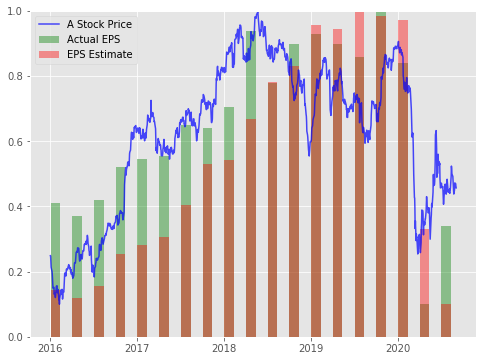

In [1602]:
stock_data.sort_values(['Ticker', 'Date'])
def stockvsearnings(stock_data, earnings_data, Ticker):
    data = stock_data[stock_data['Ticker']==Ticker]
    data = data.set_index('Date')
    minmaxscaler = preprocessing.MinMaxScaler(feature_range = (0.1,1))
    data_scaled =pd.DataFrame(minmaxscaler.fit_transform(data[['HLOC']].values))
    data_scaled = data_scaled.set_index(pd.to_datetime(data.index))
    
    earnings_plot = earnings_data[earnings_data['Ticker']== Ticker]
    earnings_plot = earnings_plot.set_index('Earnings_Date')
    earnings_plot = earnings_plot[['Actual_EPS', 'EPS_Estimate']]
    earnings_plot['Actual_EPS'] = (minmaxscaler.fit_transform(earnings_plot['Actual_EPS'].values.reshape(-1,1)))
    earnings_plot['EPS_Estimate'] = (minmaxscaler.fit_transform(earnings_plot['EPS_Estimate'].values.reshape(-1,1)))
    
    plt.style.use('ggplot')
    fig, ax1 = plt.subplots(figsize = (8,6))
    ax1.set_ylim(0,1)

    ax1.plot(data_scaled.index, data_scaled, color = 'blue', alpha = 0.7)
    ax1.bar(earnings_plot.index, earnings_plot['Actual_EPS'],width = 40, color = 'green', alpha = 0.4)
    ax1.bar(earnings_plot.index, earnings_plot['EPS_Estimate'],width = 40, color = 'red', alpha = 0.4)
    ax1.legend(['A Stock Price','Actual EPS', 'EPS Estimate'])
stockvsearnings(stock_data, earnings_data, 'ZION')

In [1530]:
earnings_data['Earnings_Change'] = earnings_data.groupby('Ticker')['Actual_EPS'].apply(pd.Series.pct_change)
earnings_data

,Ticker,Earnings_Date,QTR,EPS_Estimate,Actual_EPS,Release_Time,%Difference,earningskey,1daybefore,1dayafter,7daybefore,7dayafter,price,%Price_Change,%SPY_CHANGE,Earnings_Change
0,A,2016-02-16,01/2016,0.430,0.46,post,0.069767,2016-02-16A,0.024735,-0.009556,-0.002880,0.018006,35.3175,NaN,NaN,NaN
1,A,2016-05-16,04/2016,0.390,0.44,post,0.128205,2016-05-16A,0.003722,0.042244,0.049359,0.058643,41.1300,0.164578,0.095559,-0.043478
2,A,2016-08-17,07/2016,0.470,0.49,post,0.042553,2016-08-17A,0.002899,-0.034798,0.023804,-0.021022,46.6975,0.135363,0.063707,0.113636
3,A,2016-11-15,10/2016,0.520,0.59,post,0.134615,2016-11-15A,-0.012098,0.026202,0.043257,-0.012716,43.8900,-0.060121,0.003274,0.204082
4,A,2017-02-14,01/2017,0.490,0.53,post,0.081633,2017-02-14A,-0.005199,0.018956,0.031240,0.024107,48.7975,0.111814,0.077241,-0.101695
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9132,ZTS,2019-08-06,06/2019,0.820,0.90,pre,0.097561,2019-08-06ZTS,-0.020290,0.050593,-0.011742,0.078114,118.8300,0.176709,-0.011561,0.022727
9133,ZTS,2019-11-07,Q3,0.883,0.94,pre,0.064553,2019-11-07ZTS,-0.012082,0.018167,-0.031748,-0.030618,122.5950,0.031684,0.081787,0.044444
9134,ZTS,2020-02-13,Q4,0.879,0.92,pre,0.046644,2020-02-13ZTS,-0.001956,0.001837,0.056849,-0.030250,143.1600,0.167747,0.096560,-0.021277
9135,ZTS,2020-05-06,Q1,0.862,0.95,pre,0.102088,2020-05-06ZTS,0.022929,-0.027456,0.040834,-0.047318,126.3700,-0.117281,-0.145064,0.032609


In [1539]:
earnings_data['7daybefore'] = earnings_data.groupby('Ticker')['7daybefore'].apply(lambda x: x.fillna(x.mean())).values
earnings_data['Beat'] = earnings_data.groupby('Ticker').apply(lambda x: x['%Difference'] > 0 ).values
earnings_data['After_Increase'] = earnings_data.groupby('Ticker').apply(lambda x: x['7dayafter'] > 0 ).values
earnings_data['Before_Increase'] = earnings_data.groupby('Ticker').apply(lambda x: x['7daybefore'] > 0 ).values
earnings_data.head(100)

,Ticker,Earnings_Date,QTR,EPS_Estimate,Actual_EPS,Release_Time,%Difference,earningskey,1daybefore,1dayafter,7daybefore,7dayafter,price,%Price_Change,%SPY_CHANGE,Earnings_Change,Beat,After_Increase,Before_Increase
0,A,2016-02-16,01/2016,0.430,0.46,post,0.069767,2016-02-16A,0.024735,-0.009556,-0.002880,0.018006,35.3175,NaN,NaN,NaN,True,True,False
1,A,2016-05-16,04/2016,0.390,0.44,post,0.128205,2016-05-16A,0.003722,0.042244,0.049359,0.058643,41.1300,0.164578,0.095559,-0.043478,True,True,True
2,A,2016-08-17,07/2016,0.470,0.49,post,0.042553,2016-08-17A,0.002899,-0.034798,0.023804,-0.021022,46.6975,0.135363,0.063707,0.113636,True,False,True
3,A,2016-11-15,10/2016,0.520,0.59,post,0.134615,2016-11-15A,-0.012098,0.026202,0.043257,-0.012716,43.8900,-0.060121,0.003274,0.204082,True,False,True
4,A,2017-02-14,01/2017,0.490,0.53,post,0.081633,2017-02-14A,-0.005199,0.018956,0.031240,0.024107,48.7975,0.111814,0.077241,-0.101695,True,True,True
5,A,2017-05-22,04/2017,0.480,0.58,post,0.208333,2017-05-22A,0.002523,0.051016,-0.004710,0.071563,54.6400,0.119729,0.031100,0.094340,True,True,False
6,A,2017-08-15,07/2017,0.520,0.59,post,0.134615,2017-08-15A,-0.003867,0.039470,-0.011625,0.054035,57.9550,0.060670,0.036060,0.017241,True,True,False
7,A,2017-11-20,10/2017,0.630,0.67,post,0.063492,2017-11-20A,0.013543,0.000184,0.022476,-0.008485,67.9150,0.171857,0.052003,0.135593,True,False,True
8,A,2018-02-14,01/2018,0.580,0.66,post,0.137931,2018-02-14A,0.009308,0.066042,-0.042961,0.030297,67.2300,-0.010086,0.039521,-0.014925,True,True,False
9,A,2018-05-14,04/2018,0.650,0.65,post,0.000000,2018-05-14A,0.004455,-0.105080,0.051341,-0.069875,68.2100,0.014577,0.027094,-0.015152,False,False,True


In [1540]:
def earningscatfull (before, beat, after):
    if before == True:
        if beat == True:
            if after == True:
                return 'Increase Beat Increase'
            else:
                return 'Increase Beat Decrease'
        else:
            if after == True:
                return 'Increase Short Increase'
            else:
                return 'Increase Short Decrease'
    else:
        if beat == True:
            if after == True:
                return 'Decrease Beat Increase'
            else:
                return 'Decrease Beat Decrease'
        else:
            if after == True:
                return 'Decrease Short Increase'
            else:
                return 'Decrease Short Decrease'
earnings_data['Earnings_Category_Full'] = earnings_data.apply(lambda x : earningscatfull(x['Before_Increase'], x['Beat'], x['After_Increase']), axis = 1)

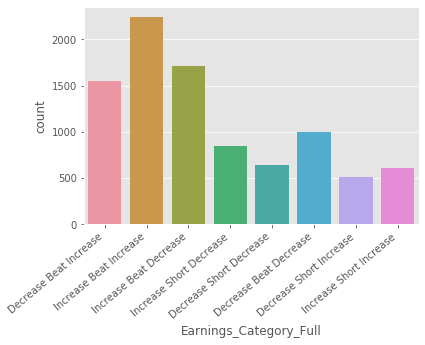

In [1541]:
ax = sns.countplot(x = 'Earnings_Category_Full', data = earnings_data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

In [1542]:
earnings_data['Earnings_Category_Full'].value_counts()

Increase Beat Increase     2239
Increase Beat Decrease     1717
Decrease Beat Increase     1552
Decrease Beat Decrease     1002
Increase Short Decrease     851
Decrease Short Decrease     647
Increase Short Increase     612
Decrease Short Increase     517
Name: Earnings_Category_Full, dtype: int64

In [1543]:
c = pd.DataFrame(earnings_data['Earnings_Category_Full'].value_counts())
c = c.reset_index()
c['Before_Stock_Effect'] = ['Increase', 'Increase', 'Decrease', 'Decrease', 'Increase', 'Decrease', 'Increase', 'Decrease']
c['Earnings_Result'] = ['Beat', 'Beat', 'Beat', 'Beat', 'Short', 'Short', "Short", 'Short']
c['After_Stock_Effect'] = ['Increase', 'Decrease', 'Increase', 'Decrease', 'Decrease', 'Decrease', 'Increase', 'Increase']
c['Stock_Effect'] = c[['Before_Stock_Effect', 'After_Stock_Effect']].apply(lambda x: '-'.join(x), axis=1)
cols = c.columns
cols = list(cols[2:]) + list(cols[0:2])
c = c[cols]
c = c.rename(columns ={'Earnings_Category_Full': 'Total_Earnings'})
c = c.rename(columns ={'index': 'Total_Effect'})
c

,Before_Stock_Effect,Earnings_Result,After_Stock_Effect,Stock_Effect,Total_Effect,Total_Earnings
0,Increase,Beat,Increase,Increase-Increase,Increase Beat Increase,2239
1,Increase,Beat,Decrease,Increase-Decrease,Increase Beat Decrease,1717
2,Decrease,Beat,Increase,Decrease-Increase,Decrease Beat Increase,1552
3,Decrease,Beat,Decrease,Decrease-Decrease,Decrease Beat Decrease,1002
4,Increase,Short,Decrease,Increase-Decrease,Increase Short Decrease,851
5,Decrease,Short,Decrease,Decrease-Decrease,Decrease Short Decrease,647
6,Increase,Short,Increase,Increase-Increase,Increase Short Increase,612
7,Decrease,Short,Increase,Decrease-Increase,Decrease Short Increase,517


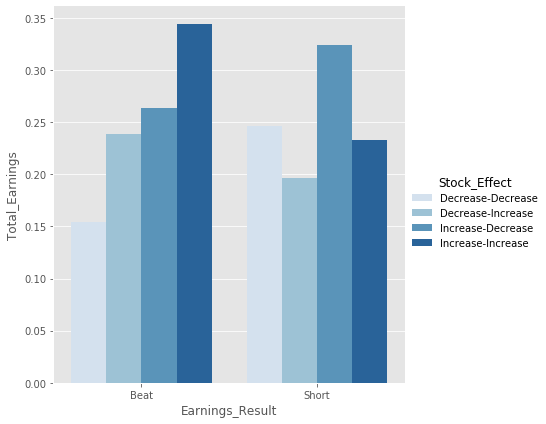

In [1544]:
percent_master = c.groupby([ 'Earnings_Result', 'Stock_Effect']).agg({'Total_Earnings': 'sum'})
percent_results = percent_master.groupby(level = 0).apply(lambda x: x/ float(x.sum()))
percent_results = percent_results.reset_index()
c_plot = sns.catplot( data = percent_results, kind = 'bar', x = 'Earnings_Result', y = 'Total_Earnings', 
                     hue ='Stock_Effect' , ci = 'sd', palette = 'Blues', height = 6, alpha= 1)

In [1545]:
def pct_dif(row):
    if row['EPS_Estimate'] <= 0.01 and row['EPS_Estimate'] >= 0:
        e_eps = 0.01
        a_eps = row['Actual_EPS']
    elif row['EPS_Estimate']>=-0.01 and row['EPS_Estimate'] <= 0:
        e_eps = -0.01
        a_eps = row['Actual_EPS']
    else:
        e_eps = row['EPS_Estimate']
        a_eps = row['Actual_EPS']
    ret_val = (a_eps -e_eps)/e_eps
    return ret_val
earnings_data['%Difference'] = earnings_data.apply(pct_dif, axis =1)

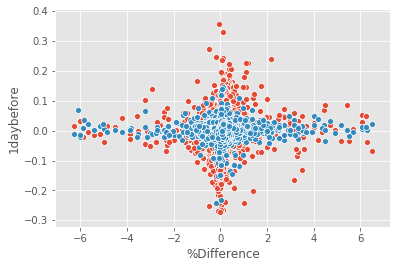

In [1558]:
a = earnings_data['%Difference'].dropna()
a = a[np.abs(sp.stats.zscore(earnings_data['%Difference'].dropna())) < 3]
b = earnings_data.loc[a.index]
sns.scatterplot(data = b, x ='%Difference', y ='1dayafter')
sns.scatterplot(data = b, x ='%Difference', y ='1daybefore')

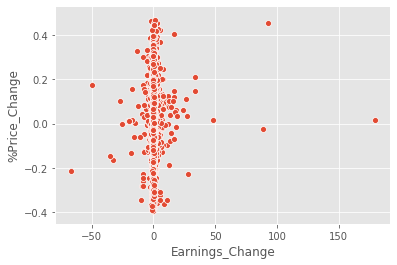

In [1566]:
a = earnings_data['%Price_Change',]
a = a[np.abs(sp.stats.zscore(earnings_data['%Price_Change'].dropna())) < 3]
b = earnings_data.loc[a.index]
sns.scatterplot(data = b, x = 'Earnings_Change', y = '%Price_Change')

In [1598]:
a = earnings_data[['%Price_Change', 'Earnings_Change']]
a = a.dropna()
(np.abs(sp.stats.zscore(a['%Price_Change'])) <3) 
a[a['Earnings_Change'] == np.inf]

,%Price_Change,Earnings_Change
2013,-0.012591,inf
4396,-0.035416,inf
5480,-0.032845,inf
6017,0.028311,inf
6091,-0.186841,inf
8600,0.021422,inf
8602,-0.016175,inf


In [1576]:
np.abs(sp.stats.zscore(earnings_data['Earnings_Change'].dropna())) < 3

/Users/louiszhao/anaconda2/envs/p36workshop/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.


array([False, False, False, ..., False, False, False])

In [1292]:
earnings_data['%Price_Change_Adjusted'] = earnings_data['%Price_Change'] - earnings_data['%SPY_CHANGE']
earnings_data['14dayperiod'] = earnings_data['7daybefore'] + earnings_data['7dayafter']

In [1295]:
earnings_data.head(100)

,Ticker,Earnings_Date,QTR,EPS_Estimate,Actual_EPS,Release_Time,%Difference,earningskey,7daybefore,7dayafter,price,%Price_Change,%SPY_CHANGE,Beat,After_Increase,Before_Increase,Earnings_Category,Earnings_Category_Full,%Price_Change_Adjusted,14dayperiod
0,A,2016-02-16,01/2016,0.430,0.46,post,0.069767,2016-02-16A,0.008648,0.018006,35.3175,NaN,NaN,True,True,True,Increase After Beat,Increase Beat Increase,NaN,0.026654
1,A,2016-05-16,04/2016,0.390,0.44,post,0.128205,2016-05-16A,0.049359,0.058643,41.1300,0.164578,0.095559,True,True,True,Increase After Beat,Increase Beat Increase,0.069019,0.108002
2,A,2016-08-17,07/2016,0.470,0.49,post,0.042553,2016-08-17A,0.023804,-0.021022,46.6975,0.135363,0.063707,True,False,True,Decrease After Beat,Increase Beat Decrease,0.071657,0.002782
3,A,2016-11-15,10/2016,0.520,0.59,post,0.134615,2016-11-15A,0.043257,-0.012716,43.8900,-0.060121,0.003274,True,False,True,Decrease After Beat,Increase Beat Decrease,-0.063395,0.030541
4,A,2017-02-14,01/2017,0.490,0.53,post,0.081633,2017-02-14A,0.031240,0.024107,48.7975,0.111814,0.077241,True,True,True,Increase After Beat,Increase Beat Increase,0.034573,0.055347
5,A,2017-05-22,04/2017,0.480,0.58,post,0.208333,2017-05-22A,-0.004710,0.071563,54.6400,0.119729,0.031100,True,True,False,Increase After Beat,Decrease Beat Increase,0.088630,0.066854
6,A,2017-08-15,07/2017,0.520,0.59,post,0.134615,2017-08-15A,-0.011625,0.054035,57.9550,0.060670,0.036060,True,True,False,Increase After Beat,Decrease Beat Increase,0.024610,0.042410
7,A,2017-11-20,10/2017,0.630,0.67,post,0.063492,2017-11-20A,0.022476,-0.008485,67.9150,0.171857,0.052003,True,False,True,Decrease After Beat,Increase Beat Decrease,0.119855,0.013991
8,A,2018-02-14,01/2018,0.580,0.66,post,0.137931,2018-02-14A,-0.042961,0.030297,67.2300,-0.010086,0.039521,True,True,False,Increase After Beat,Decrease Beat Increase,-0.049607,-0.012664
9,A,2018-05-14,04/2018,0.650,0.65,post,0.000000,2018-05-14A,0.051341,-0.069875,68.2100,0.014577,0.027094,False,False,True,Decrease After Short,Increase Short Decrease,-0.012517,-0.018534


In [1311]:
a = earnings_data[earnings_data['Beat'] == False].groupby('Ticker').agg({'Beat': 'count'})
a.sort_values(by = ['Beat'])

,Beat
Ticker,
ZTS,1
PEAK,1
OMC,1
NOW,1
NOC,1
...,...
VTR,16
SLG,16
O,16


In [1316]:
earnings_data.head(100)

,Ticker,Earnings_Date,QTR,EPS_Estimate,Actual_EPS,Release_Time,%Difference,earningskey,7daybefore,7dayafter,price,%Price_Change,%SPY_CHANGE,Beat,After_Increase,Before_Increase,Earnings_Category,Earnings_Category_Full,%Price_Change_Adjusted,14dayperiod
0,A,2016-02-16,01/2016,0.430,0.46,post,0.069767,2016-02-16A,0.008648,0.018006,35.3175,NaN,NaN,True,True,True,Increase After Beat,Increase Beat Increase,NaN,0.026654
1,A,2016-05-16,04/2016,0.390,0.44,post,0.128205,2016-05-16A,0.049359,0.058643,41.1300,0.164578,0.095559,True,True,True,Increase After Beat,Increase Beat Increase,0.069019,0.108002
2,A,2016-08-17,07/2016,0.470,0.49,post,0.042553,2016-08-17A,0.023804,-0.021022,46.6975,0.135363,0.063707,True,False,True,Decrease After Beat,Increase Beat Decrease,0.071657,0.002782
3,A,2016-11-15,10/2016,0.520,0.59,post,0.134615,2016-11-15A,0.043257,-0.012716,43.8900,-0.060121,0.003274,True,False,True,Decrease After Beat,Increase Beat Decrease,-0.063395,0.030541
4,A,2017-02-14,01/2017,0.490,0.53,post,0.081633,2017-02-14A,0.031240,0.024107,48.7975,0.111814,0.077241,True,True,True,Increase After Beat,Increase Beat Increase,0.034573,0.055347
5,A,2017-05-22,04/2017,0.480,0.58,post,0.208333,2017-05-22A,-0.004710,0.071563,54.6400,0.119729,0.031100,True,True,False,Increase After Beat,Decrease Beat Increase,0.088630,0.066854
6,A,2017-08-15,07/2017,0.520,0.59,post,0.134615,2017-08-15A,-0.011625,0.054035,57.9550,0.060670,0.036060,True,True,False,Increase After Beat,Decrease Beat Increase,0.024610,0.042410
7,A,2017-11-20,10/2017,0.630,0.67,post,0.063492,2017-11-20A,0.022476,-0.008485,67.9150,0.171857,0.052003,True,False,True,Decrease After Beat,Increase Beat Decrease,0.119855,0.013991
8,A,2018-02-14,01/2018,0.580,0.66,post,0.137931,2018-02-14A,-0.042961,0.030297,67.2300,-0.010086,0.039521,True,True,False,Increase After Beat,Decrease Beat Increase,-0.049607,-0.012664
9,A,2018-05-14,04/2018,0.650,0.65,post,0.000000,2018-05-14A,0.051341,-0.069875,68.2100,0.014577,0.027094,False,False,True,Decrease After Short,Increase Short Decrease,-0.012517,-0.018534


In [176]:
MSFT_earnings = earnings_data[earnings_data['Ticker'] == 'MSFT']
MSFT_earnings

,Ticker,Company_Name,Before/After Market,EPS Estimate,Actual EPS,% Difference,Date
8753,MSFT,Microsoft Corporation,Time Not Supplied,1.21,1.37,12.94,2019-07-17


In [61]:
try:
    test = data.DataReader(TIC_list[66], 'yahoo', start_date, end_date)
except Exception:
    pass


In [62]:
saved = stock_data

In [77]:
for tic in TIC_list[66:67]:
    print (tic)
TIC_list[67]

BRK.B


'BBY'

In [14]:
start_date = date(2019, 1, 6)   # start date
end_date = date(2020, 9, 9)
df = data.DataReader(TIC_list[0:3], 'google', start_date, end_date)


NotImplementedError: data_source='google' is not implemented

In [13]:
df

NameError: name 'df' is not defined

In [299]:
df.to_frame()

AttributeError: 'DataFrame' object has no attribute 'to_frame'